In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("clean_zillow.csv", index_col="Unnamed: 0")
df.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,...,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc
0,14297519,3.5,4.0,6.0,3100.0,3100.0,6059.0,3.0,33634931.0,-117869207.0,...,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,0.025595,2017-01-01,None,Single Family Residential
1,17052889,1.0,2.0,6.0,1465.0,1465.0,6111.0,1.0,34449266.0,-119281531.0,...,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,0.055619,2017-01-01,None,Single Family Residential
2,14186244,2.0,3.0,6.0,1243.0,1243.0,6059.0,2.0,33886168.0,-117823170.0,...,1962.0,85289.0,564778.0,2016.0,479489.0,6488.30,0.005383,2017-01-01,None,Single Family Residential
3,12177905,3.0,4.0,8.0,2376.0,2376.0,6037.0,3.0,34245180.0,-118240722.0,...,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,-0.103410,2017-01-01,Central,Single Family Residential
6,12095076,3.0,4.0,9.0,2962.0,2962.0,6037.0,3.0,34145202.0,-118179824.0,...,1950.0,276684.0,773303.0,2016.0,496619.0,9516.26,-0.001011,2017-01-01,Central,Single Family Residential


In [3]:
# Now is the part of the episode where we split the data
train, test = train_test_split(df, random_state=42)

In [4]:
train.fips.value_counts()

6037.0    25324
6059.0    10610
6111.0     3267
Name: fips, dtype: int64

In [6]:
# Convert fips to county name, use https://transition.fcc.gov/oet/info/maps/census/fips/fips.txt

train.fips = train.fips.replace({6037.0:'Los_Angeles_County', 6059.0:'Orange_County', 6111.0:'Ventura'})
train.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,...,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc
37468,12627622,1.0,1.0,4.0,1182.0,1182.0,Los_Angeles_County,1.0,33787462.0,-118277445.0,...,1925.0,22136.0,40747.0,2016.0,18611.0,580.38,0.008593,2017-05-18,Floor/Wall,Single Family Residential
47259,17270989,2.5,4.0,6.0,3105.0,3105.0,Ventura,2.0,34173279.0,-118947401.0,...,1979.0,262037.0,333135.0,2016.0,71098.0,3959.58,0.066530,2017-06-16,None,Single Family Residential
49467,12016313,2.0,2.0,6.0,1930.0,1930.0,Los_Angeles_County,2.0,34102244.0,-118356115.0,...,1920.0,50713.0,98737.0,2016.0,48024.0,1387.47,0.286521,2017-06-22,Floor/Wall,Single Family Residential
71164,14476758,3.0,2.0,6.0,1818.0,1818.0,Orange_County,3.0,33624351.0,-117632667.0,...,1985.0,102377.0,183194.0,2016.0,80817.0,1801.66,0.051875,2017-08-29,Forced air,Single Family Residential
38663,11936023,1.0,2.0,4.0,832.0,832.0,Los_Angeles_County,1.0,34079748.0,-118251495.0,...,1920.0,132600.0,663000.0,2016.0,530400.0,8023.38,0.089748,2017-05-23,Floor/Wall,Single Family Residential


In [8]:
# Before any graphing, let's change the fips, zipcode, regionids to categorical variables

for col in ['fips', 'regionidcity', 'regionidcounty', 'regionidzip']:
    train[col] = train[col].astype('object')

In [9]:
# Let's scale the numeric columns
scaler = MinMaxScaler()

numeric_columns = list(train.select_dtypes('number').columns)
train[numeric_columns] = scaler.fit_transform(train[numeric_columns])

In [10]:
train.regionidzip.value_counts()

97319.0    578
97318.0    512
97329.0    428
97328.0    382
97118.0    379
          ... 
96039.0      2
96038.0      1
96467.0      1
96323.0      1
96434.0      1
Name: regionidzip, Length: 378, dtype: int64

In [11]:
train.columns.tolist()

['parcelid',
 'bathroomcnt',
 'bedroomcnt',
 'buildingqualitytypeid',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'fips',
 'fullbathcnt',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'propertycountylandusecode',
 'rawcensustractandblock',
 'regionidcity',
 'regionidcounty',
 'regionidzip',
 'roomcnt',
 'unitcnt',
 'yearbuilt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'assessmentyear',
 'landtaxvaluedollarcnt',
 'taxamount',
 'logerror',
 'transactiondate',
 'heatingorsystemdesc',
 'propertylandusedesc']

In [12]:
train.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,...,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc
37468,0.012208,0.000000,0.0,0.272727,0.047298,0.047298,Los_Angeles_County,0.000000,0.304624,0.623690,...,0.009478,0.002399,0.001566,0.0,0.000789,0.001826,0.470238,2017-05-18,Floor/Wall,Single Family Residential
47259,0.041797,0.125000,0.3,0.454545,0.135602,0.135602,Ventura,0.083333,0.567782,0.274896,...,0.020367,0.028576,0.013086,0.0,0.003139,0.013440,0.476079,2017-06-16,None,Single Family Residential
49467,0.008312,0.083333,0.1,0.454545,0.081646,0.081646,Los_Angeles_County,0.083333,0.519331,0.582733,...,0.008469,0.005517,0.003851,0.0,0.002105,0.004600,0.498259,2017-06-22,Floor/Wall,Single Family Residential
71164,0.023991,0.166667,0.1,0.454545,0.076503,0.076503,Orange_County,0.166667,0.193370,0.959375,...,0.021577,0.011155,0.007179,0.0,0.003574,0.006023,0.474601,2017-08-29,Forced air,Single Family Residential
38663,0.007801,0.000000,0.1,0.272727,0.031226,0.031226,Los_Angeles_County,0.000000,0.503987,0.637200,...,0.008469,0.014452,0.026083,0.0,0.023703,0.027408,0.478420,2017-05-23,Floor/Wall,Single Family Residential


In [13]:
# Let's chart out a subset of columns for now, so the charts run in a decent amount of time
df = train[["bathroomcnt", "bedroomcnt", "lotsizesquarefeet", "yearbuilt", "calculatedfinishedsquarefeet", "taxamount", "taxvaluedollarcnt", "logerror", "fips", "longitude", "latitude", "regionidzip"]]


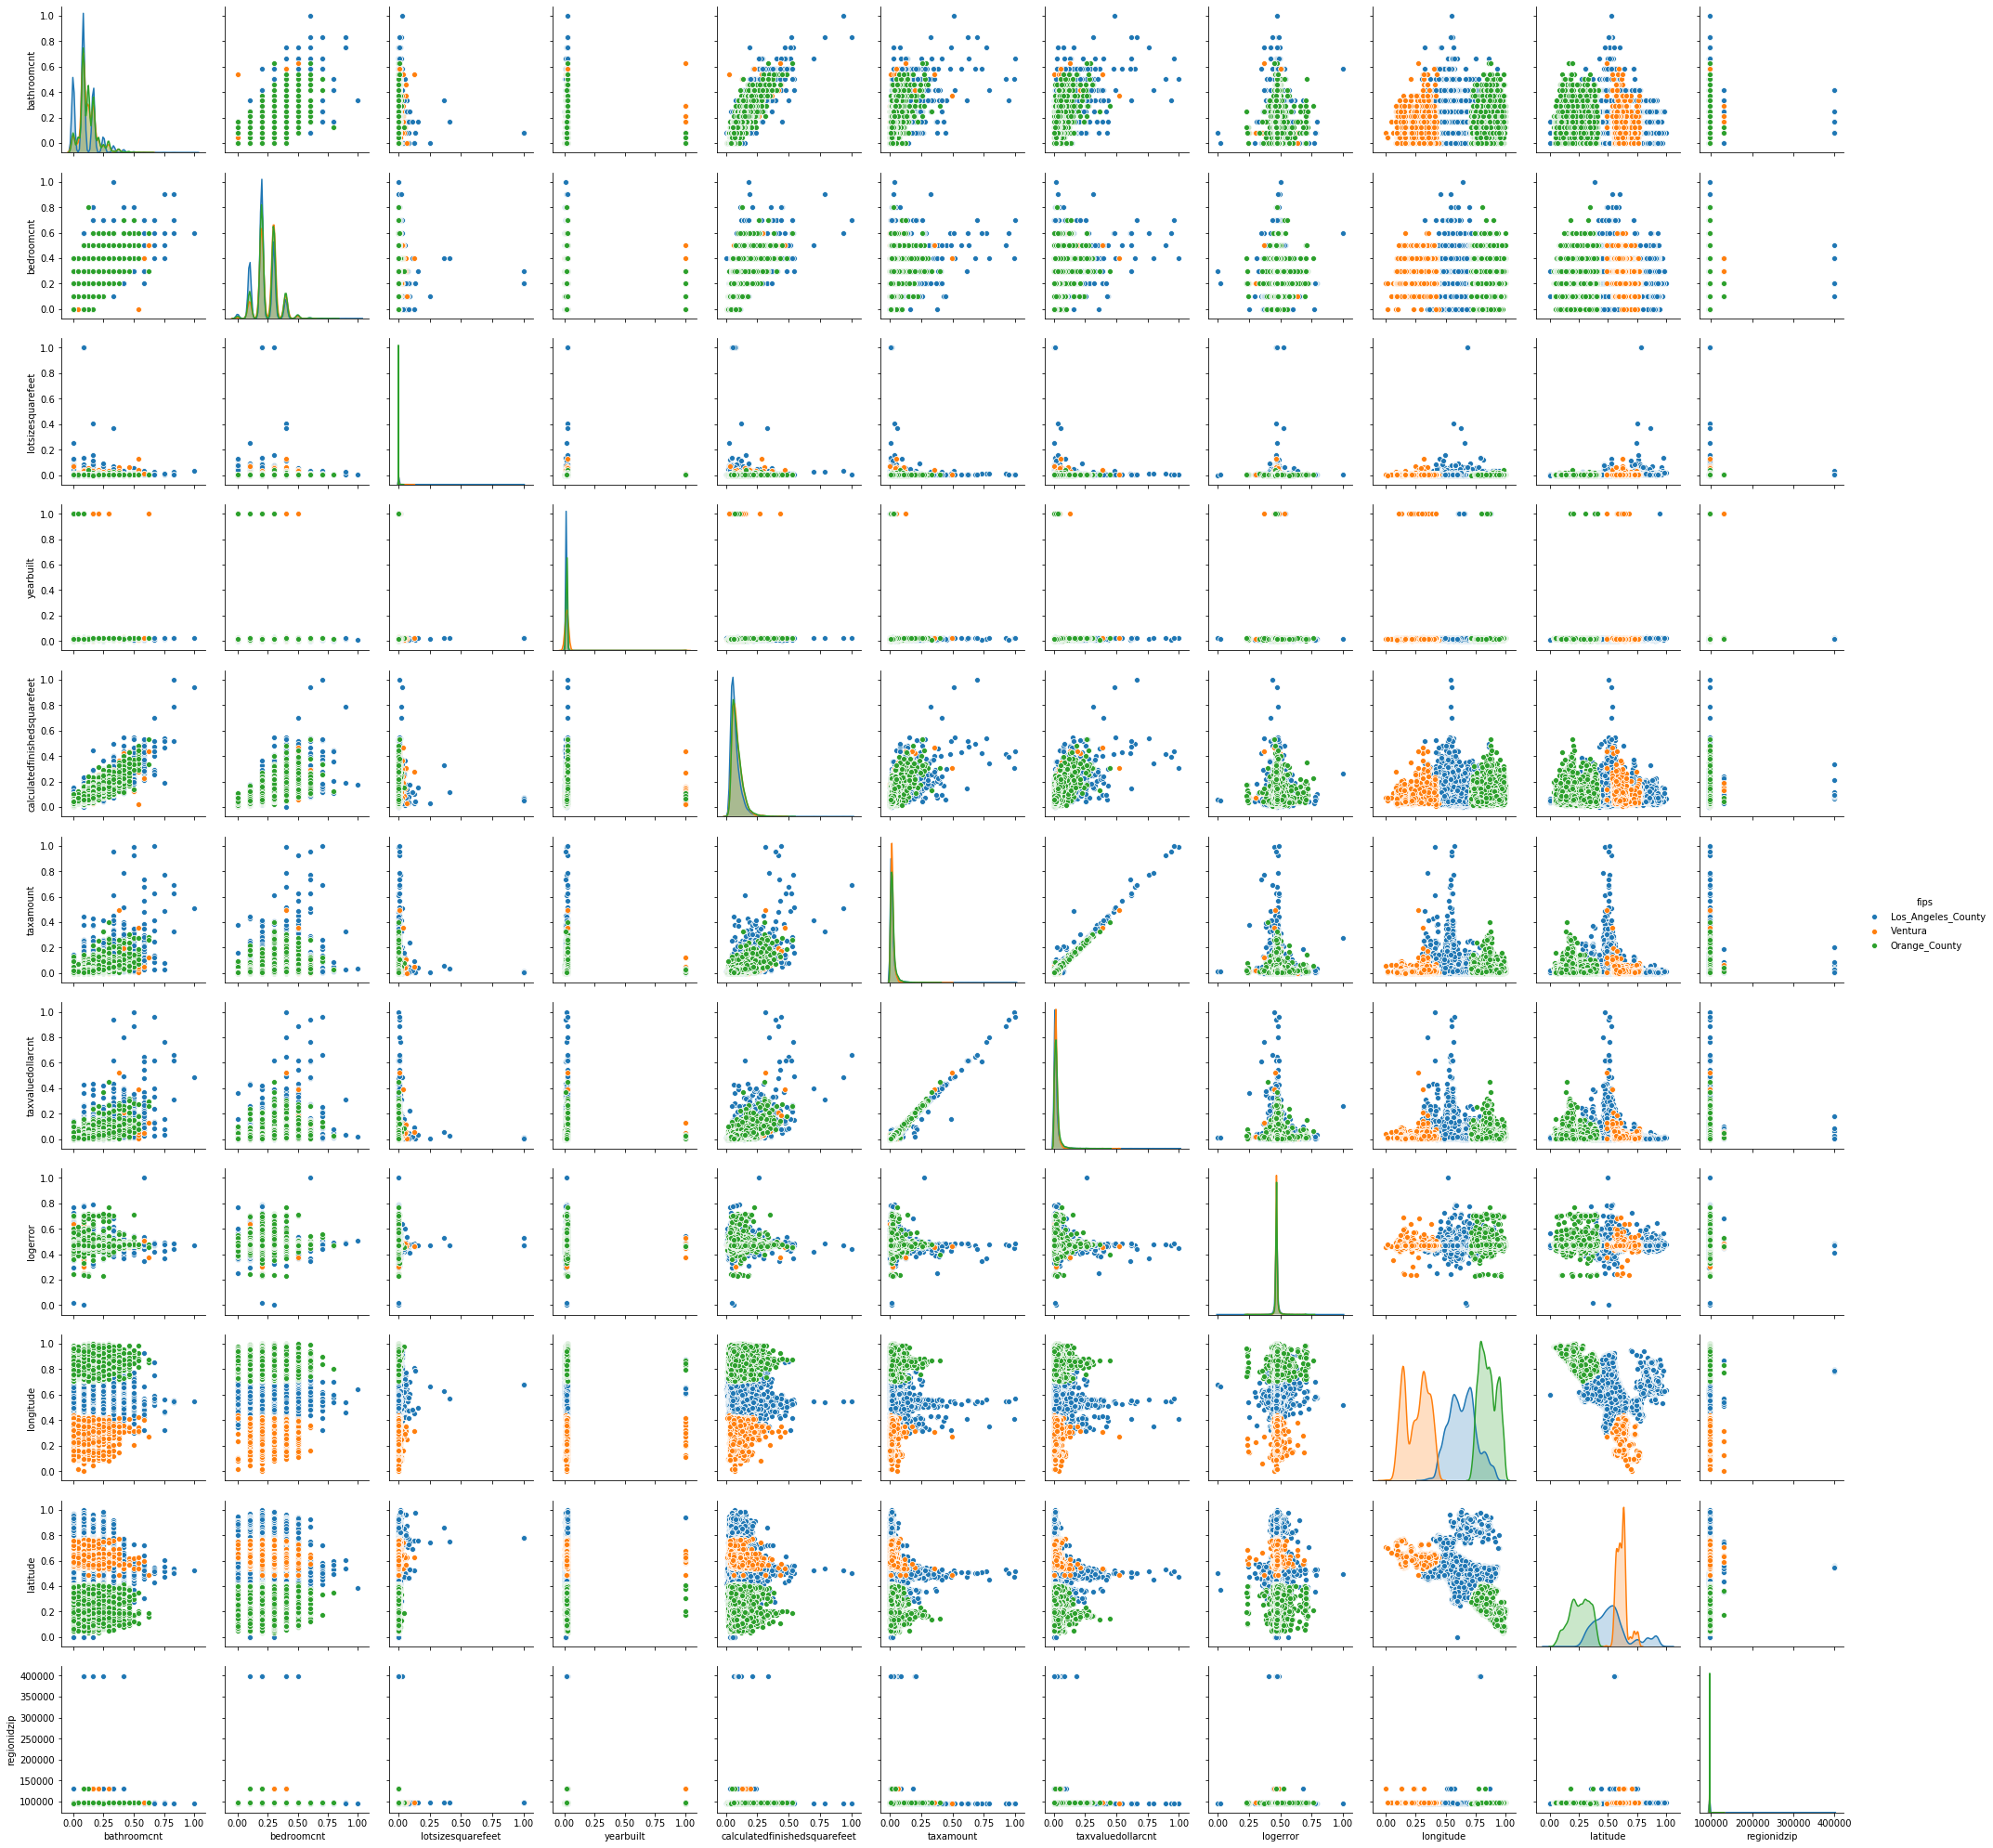

In [14]:
sns.pairplot(df, hue="fips")

37468    0.304624
47259    0.567782
49467    0.519331
71164    0.193370
38663    0.503987
           ...   
16837    0.290522
66401    0.348588
56495    0.492436
1286     0.533046
23645    0.197839
Name: latitude, Length: 39201, dtype: float64

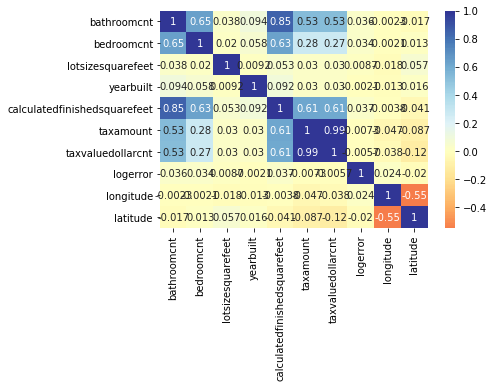

In [16]:
sns.heatmap(df.corr(), cmap='RdYlBu', annot=True, center=0)

## Overall Goal
- Because we'll be focused on log(error), we're try to capture insights they didn't catch in their model

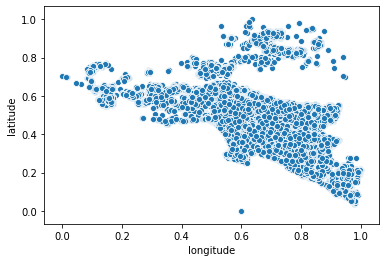

In [17]:
sns.scatterplot(x='longitude', y='latitude', data=df)
plt.show()

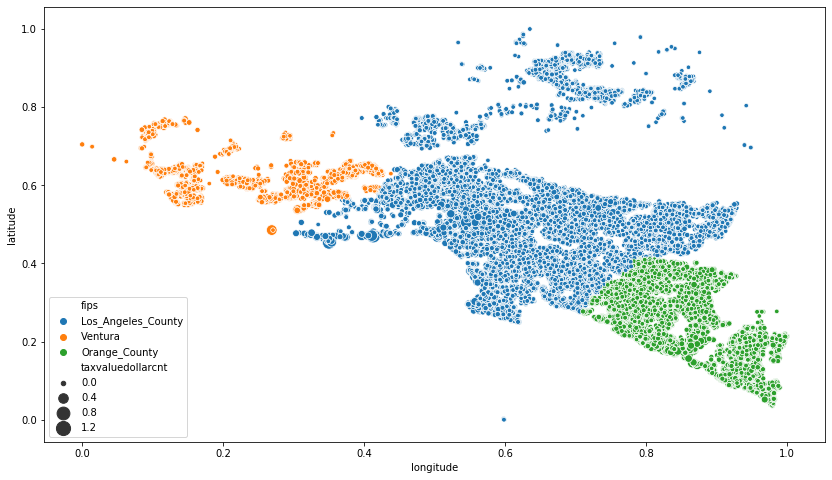

In [20]:
plt.figure(figsize=(14,8))
sns.scatterplot(x='longitude',y='latitude', hue='fips', size='taxvaluedollarcnt',sizes=(20,200),data=df)
plt.legend()
plt.show()

## Exercise 5
- Compute the mean(logerror) by zipcode and the overall mean(logerror). 
- Write a loop that will run a t-test between the overall mean and the mean for each zip code. 
- We want to identify the zip codes where the error is significantly higher or lower than the expected error.


In [21]:
population_logerror_mean = df.logerror.mean()
zipcode_logerror_mean = df.groupby("regionidzip")['regionidzip','logerror'].mean().reset_index()

In [24]:
f"{population_logerror_mean} is the logerror of the population"

'0.4711972136169869 is the logerror of the population'

In [22]:
zipcode_logerror_mean.head()

,regionidzip,logerror
0,95982.0,0.469925
1,95983.0,0.470857
2,95984.0,0.461593
3,95985.0,0.465565
4,95986.0,0.468699


In [36]:
# Prior to running any statistical tests, decide on a confidence level
confidence_level = 0.99
alpha = 1 - confidence_level

In [37]:
# Write a loop that will run a t-test between the overall mean and the mean for each zip code. 
zipcodes = df.regionidzip.unique()

In [38]:
# Reduce the cognitive overhead
# Solve a simpler problem

zipcode = zipcodes[0]

# Run a t-test between the population mean and the mean of a subgroup (zipcode)
t, p = stats.ttest_1samp(df[df.regionidzip == zipcode].logerror, population_logerror_mean)

96228.0

In [46]:
# Our null hypothesis is that the logerror of the population and the logerror of this zipcode are the same.
# null_hypothesis = "population logerror and logerror of this zip are the same"

# if p < alpha:
#     print("Reject the null hypothesis that", null_hypothesis)
# else:
#     print("Fail to reject the null hypothesis that", null_hypothesis)

Fail to reject the null hypothesis that population logerror and logerror of this zip are the same


0.08049942673077891

## Goal: 
Identify the zip codes with logerror significantly different than population logerror

In [ ]:
zipcodes_with_significantly_different_errors = []

In [48]:
zipcodes = df.regionidzip.unique()

# if we reject the null hypothesis for a zipcode, add that zipcode to the list of zips with differences
for zipcode in zipcodes:
    # Run a t-test between the population mean and the mean of a subgroup (zipcode)
    t, p = stats.ttest_1samp(df[df.regionidzip == zipcode].logerror, population_logerror_mean)
    if p < alpha:
        zipcodes_with_significantly_different_errors.append(zipcode)
        

In [49]:
zipcodes_with_significantly_different_errors

[96007.0,
 96517.0,
 96377.0,
 96120.0,
 96026.0,
 96321.0,
 96946.0,
 96137.0,
 96941.0,
 96047.0,
 95989.0,
 96237.0,
 95984.0,
 96020.0,
 96152.0,
 96948.0,
 96097.0]

In [52]:
properties_with_low_or_high_error = df[df.regionidzip.isin(zipcodes_with_significantly_different_errors)]
properties_with_low_or_high_error

,bathroomcnt,bedroomcnt,lotsizesquarefeet,yearbuilt,calculatedfinishedsquarefeet,taxamount,taxvaluedollarcnt,logerror,fips,longitude,latitude,regionidzip
38663,0.000000,0.1,0.000918,0.008469,0.031226,0.027408,0.026083,0.478420,Los_Angeles_County,0.637200,0.503987,96007
36729,0.083333,0.2,0.001103,0.012301,0.082380,0.027781,0.024310,0.473362,Los_Angeles_County,0.748160,0.515842,96517
8267,0.166667,0.2,0.000317,0.025408,0.068650,0.021740,0.017888,0.462563,Los_Angeles_County,0.478043,0.748338,96377
62424,0.166667,0.2,0.002491,0.015527,0.218625,0.018874,0.017316,0.483604,Los_Angeles_County,0.507869,0.491915,96120
2227,0.083333,0.2,0.000827,0.012704,0.057859,0.004114,0.003631,0.474839,Los_Angeles_County,0.563398,0.423731,96026
...,...,...,...,...,...,...,...,...,...,...,...,...
75970,0.083333,0.2,0.001277,0.014519,0.083620,0.033334,0.031520,0.478596,Los_Angeles_County,0.558247,0.430910,96026
34675,0.250000,0.3,0.001508,0.015326,0.191716,0.110556,0.105720,0.435993,Los_Angeles_County,0.487736,0.477200,96120
14535,0.000000,0.2,0.000728,0.012301,0.047573,0.009226,0.008445,0.463926,Los_Angeles_County,0.625446,0.426184,95984
15909,0.083333,0.2,0.000846,0.012906,0.081278,0.014168,0.013206,0.476592,Los_Angeles_County,0.565294,0.420066,96026


In [54]:
df.fips.value_counts()

Los_Angeles_County    25324
Orange_County         10610
Ventura                3267
Name: fips, dtype: int64

## Is logerror significantly different for properties:
- LA County vs Orange County vs Ventura County?

In [53]:
# Null Hypothesis 1: LA County and Orange County have similar logerror
# Null Hypothesis 2: LA Countuy and Ventury County have similar logerror
# Null Hypothesis 3: Orange County and Ventury County have similar logerror

In [59]:
la = df[df.fips == "Los_Angeles_County"]
orange = df[df.fips == "Orange_County"]
ventura = df[df.fips == "Ventura"]

$H_0$: Logerror for LA County and Orange County properies are the same

$H_a$: Logerror for LA County and Orange County are significantly different

In [56]:
alpha = .01 # confidence level of .99

t, p = stats.ttest_ind(la.logerror, orange.logerror)

if p < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


In [60]:
# Conclusion so far:
print("Logerror for LA County and Orange County are significantly different")

Logerror for LA County and Orange County are significantly different


In [63]:
alpha = .01 # confidence level of .99

t, p = stats.ttest_ind(la.logerror, ventura.logerror)

if p < alpha:
    print("Reject the null hypothesis")
    print("Logerror for LA County and Ventura County are significantly different")
else:
    print("Fail to reject the null hypothesis")
    print("We fail to reject the null that Logerror for LA County and Ventury are the same")

Fail to reject the null hypothesis
We fail to reject the null that Logerror for LA County and Ventury are the same


In [65]:
alpha = .01 # confidence level of .99

t, p = stats.ttest_ind(ventura.logerror, orange.logerror)

if p < alpha:
    print("Reject the null hypothesis")
    print("Logerror between ventura county and orange county are significantly different")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis
Logerror between ventura county and orange county are significantly different


## Conclusions So far:
- Ventura and Orange have significantly different log errors
- LA County and Orange County have significantly different log errors
- We fail to reject the hypothesis that LA County and Venura have statistically similar errors 